In [300]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from AuctionAllocation import *
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import shap

In [2]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS.json')

In [3]:
# Instantiate Agent and Auction objects
agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items,
                        agents2item_values,
                        agents,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/3 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DR 1:  38%|███▊      | 6180/16384 [00:01<00:02, 4337.39it/s]
/Users/keithwu/Documents/GitHub/auction-gym/src/Models.py:44: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3281.)
  P = (1 + torch.exp(1 - X.matmul(self.m[item, :].T))) ** (-1)


Stopping at Epoch 6180



DR 1: 100%|██████████| 32768/32768 [00:07<00:00, 4194.04it/s]


AUC predicting P(win):				 0.717935666165095
Estimated Utility	 Mean Error:			 0.25527781827607504
Estimated Utility	 Mean Absolute Error:	 0.2655367755428062



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1246.62it/s]


Predicted mu Gammas:  tensor(0.9652, grad_fn=<MinBackward1>) tensor(1.0146, grad_fn=<MaxBackward1>) tensor(0.9999, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0485, grad_fn=<MinBackward1>) tensor(0.0603, grad_fn=<MaxBackward1>) tensor(0.0516, grad_fn=<MeanBackward0>)



DR 1:  11%|█         | 3461/32768 [00:04<00:35, 820.60it/s]


Stopping at Epoch 3461
DR 1 Number of samples:  torch.Size([6673, 2])
DR 1 Predicted Gammas:  0.6612093 0.81274045 0.7436589
agent: 1




DR 2:  34%|███▍      | 5651/16384 [00:01<00:03, 3134.77it/s]


Stopping at Epoch 5651



DR 2: 100%|██████████| 32768/32768 [00:07<00:00, 4106.23it/s]


AUC predicting P(win):				 0.7564176763103457
Estimated Utility	 Mean Error:			 0.6337180744981278
Estimated Utility	 Mean Absolute Error:	 0.6547823806289519



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1243.51it/s]


Predicted mu Gammas:  tensor(0.9276, grad_fn=<MinBackward1>) tensor(1.0196, grad_fn=<MaxBackward1>) tensor(0.9992, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0473, grad_fn=<MinBackward1>) tensor(0.0760, grad_fn=<MaxBackward1>) tensor(0.0526, grad_fn=<MeanBackward0>)



DR 2:   0%|          | 76/32768 [00:00<00:43, 759.61it/s]

Epoch 00125: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   1%|          | 234/32768 [00:00<00:41, 784.40it/s]

Epoch 00226: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|          | 314/32768 [00:00<00:41, 786.70it/s]

Epoch 00327: reducing learning rate of group 0 to 5.6000e-05.



DR 2:   1%|▏         | 474/32768 [00:00<00:40, 792.47it/s]

Epoch 00428: reducing learning rate of group 0 to 1.1200e-05.


DR 2:   2%|▏         | 552/32768 [00:00<00:41, 785.48it/s]


Epoch 00529: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 552
DR 2 Number of samples:  torch.Size([6689, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0
agent: 2




DR 3:  32%|███▏      | 5320/16384 [00:01<00:03, 2949.74it/s]


Stopping at Epoch 5320



DR 3: 100%|██████████| 32768/32768 [00:07<00:00, 4157.70it/s]


AUC predicting P(win):				 0.890943971439788
Estimated Utility	 Mean Error:			 0.7952023127440273
Estimated Utility	 Mean Absolute Error:	 0.8241888851260761



Initialising Policy:  77%|███████▋  | 12569/16384 [00:10<00:03, 1222.02it/s]


Stopping at Epoch 12569
Predicted mu Gammas:  tensor(0.9921, grad_fn=<MinBackward1>) tensor(1.0017, grad_fn=<MaxBackward1>) tensor(0.9994, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0406, grad_fn=<MinBackward1>) tensor(0.0892, grad_fn=<MaxBackward1>) tensor(0.0502, grad_fn=<MeanBackward0>)



DR 3:   0%|          | 77/32768 [00:00<00:42, 760.91it/s]

Epoch 00120: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   1%|          | 231/32768 [00:00<00:42, 765.46it/s]

Epoch 00221: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 309/32768 [00:00<00:42, 767.95it/s]

Epoch 00322: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   1%|▏         | 463/32768 [00:00<00:42, 761.81it/s]

Epoch 00423: reducing learning rate of group 0 to 1.1200e-05.


DR 3:   2%|▏         | 536/32768 [00:00<00:42, 761.22it/s]


Epoch 00524: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 536
DR 3 Number of samples:  torch.Size([6638, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0
number of iteration: 1

agent: 0




DR 1:  17%|█▋        | 2737/16384 [00:00<00:03, 3899.09it/s]


Stopping at Epoch 2737
AUC predicting P(win):				 0.7093964003320774
Estimated Utility	 Mean Error:			 0.02192508810571199
Estimated Utility	 Mean Absolute Error:	 0.16052633464776592



DR 1:  40%|████      | 13151/32768 [00:03<00:04, 4119.55it/s]

Epoch 12604: reducing learning rate of group 0 to 6.0000e-04.
Epoch 12886: reducing learning rate of group 0 to 1.2000e-04.
Epoch 13143: reducing learning rate of group 0 to 2.4000e-05.
Epoch 13400: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  43%|████▎     | 14174/32768 [00:03<00:04, 4090.74it/s]


Epoch 13657: reducing learning rate of group 0 to 9.6000e-07.
Epoch 13914: reducing learning rate of group 0 to 1.9200e-07.
Epoch 14171: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 14174
AUC predicting P(win):				 0.7330347031128692
Estimated Utility	 Mean Error:			 0.06876859645077382
Estimated Utility	 Mean Absolute Error:	 0.18225022441620078



DR 1:   2%|▏         | 565/32768 [00:00<00:39, 805.42it/s]

Epoch 00441: reducing learning rate of group 0 to 1.4000e-03.



DR 1:   2%|▏         | 808/32768 [00:01<00:39, 801.02it/s]

Epoch 00659: reducing learning rate of group 0 to 2.8000e-04.
Epoch 00760: reducing learning rate of group 0 to 5.6000e-05.



DR 1:   3%|▎         | 970/32768 [00:01<00:39, 802.73it/s]

Epoch 00861: reducing learning rate of group 0 to 1.1200e-05.
Epoch 00962: reducing learning rate of group 0 to 2.2400e-06.



DR 1:   4%|▎         | 1211/32768 [00:01<00:39, 795.93it/s]

Epoch 01063: reducing learning rate of group 0 to 4.4800e-07.
Epoch 01164: reducing learning rate of group 0 to 8.9600e-08.



DR 1:   4%|▍         | 1402/32768 [00:01<00:39, 796.59it/s]


Epoch 01265: reducing learning rate of group 0 to 1.7920e-08.
Stopping at Epoch 1402
DR 1 Number of samples:  torch.Size([6671, 2])
DR 1 Predicted Gammas:  0.69540274 0.8078164 0.7531056
agent: 1




DR 2:  18%|█▊        | 2891/16384 [00:00<00:04, 3123.58it/s]


Stopping at Epoch 2891
AUC predicting P(win):				 0.8543188224742135
Estimated Utility	 Mean Error:			 0.21326348138300888
Estimated Utility	 Mean Absolute Error:	 0.31451723383043184



DR 2:  49%|████▊     | 15964/32768 [00:04<00:04, 3987.05it/s]

Epoch 15370: reducing learning rate of group 0 to 6.0000e-04.
Epoch 15636: reducing learning rate of group 0 to 1.2000e-04.
Epoch 15893: reducing learning rate of group 0 to 2.4000e-05.
Epoch 16150: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  51%|█████     | 16743/32768 [00:04<00:04, 3963.88it/s]


Epoch 16407: reducing learning rate of group 0 to 9.6000e-07.
Epoch 16664: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 16743
AUC predicting P(win):				 0.8577369293572348
Estimated Utility	 Mean Error:			 0.21326358481102106
Estimated Utility	 Mean Absolute Error:	 0.314517337258444



DR 2:   2%|▏         | 774/32768 [00:01<00:41, 762.49it/s]

Epoch 00624: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00735: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   3%|▎         | 927/32768 [00:01<00:41, 759.10it/s]

Epoch 00836: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00937: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   3%|▎         | 1146/32768 [00:01<00:41, 760.66it/s]


Epoch 01038: reducing learning rate of group 0 to 2.2400e-06.
Epoch 01139: reducing learning rate of group 0 to 4.4800e-07.
Stopping at Epoch 1146
DR 2 Number of samples:  torch.Size([6721, 2])
DR 2 Predicted Gammas:  0.6995668 1.0 0.99918467
agent: 2




DR 3:  16%|█▌        | 2623/16384 [00:00<00:04, 3082.36it/s]


Stopping at Epoch 2623
AUC predicting P(win):				 0.8508184219483079
Estimated Utility	 Mean Error:			 0.1696700145964233
Estimated Utility	 Mean Absolute Error:	 0.3375569131856616



DR 3:  49%|████▉     | 16205/32768 [00:04<00:04, 4007.02it/s]

Epoch 15529: reducing learning rate of group 0 to 6.0000e-04.
Epoch 15795: reducing learning rate of group 0 to 1.2000e-04.
Epoch 16052: reducing learning rate of group 0 to 2.4000e-05.
Epoch 16309: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  52%|█████▏    | 16951/32768 [00:04<00:03, 4023.89it/s]


Epoch 16566: reducing learning rate of group 0 to 9.6000e-07.
Epoch 16823: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 16951
AUC predicting P(win):				 0.8526816377725729
Estimated Utility	 Mean Error:			 0.1696700145964233
Estimated Utility	 Mean Absolute Error:	 0.3375569131856616



DR 3:   1%|          | 242/32768 [00:00<00:41, 792.92it/s]

Epoch 00103: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00204: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 404/32768 [00:00<00:40, 796.63it/s]

Epoch 00305: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00406: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 644/32768 [00:00<00:40, 787.49it/s]

Epoch 00507: reducing learning rate of group 0 to 2.2400e-06.
Epoch 00608: reducing learning rate of group 0 to 4.4800e-07.



DR 3:   3%|▎         | 846/32768 [00:01<00:40, 790.95it/s]

Epoch 00709: reducing learning rate of group 0 to 8.9600e-08.
Epoch 00810: reducing learning rate of group 0 to 1.7920e-08.
Stopping at Epoch 846
DR 3 Number of samples:  torch.Size([6608, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0
number of iteration: 2



agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3464.27it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8253050506739426
Estimated Utility	 Mean Error:			 0.0008880766626761905
Estimated Utility	 Mean Absolute Error:	 0.195779091718333



DR 1:  16%|█▌        | 5251/32768 [00:01<00:06, 3999.57it/s]

Epoch 04690: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05183: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05440: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  19%|█▉        | 6280/32768 [00:01<00:06, 3989.28it/s]


Epoch 05697: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05954: reducing learning rate of group 0 to 9.6000e-07.
Epoch 06211: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 6280
AUC predicting P(win):				 0.8239537930405505
Estimated Utility	 Mean Error:			 0.007509143451475402
Estimated Utility	 Mean Absolute Error:	 0.19498161635468053



DR 1:   2%|▏         | 797/32768 [00:01<00:40, 789.96it/s]


Stopping at Epoch 797
DR 1 Number of samples:  torch.Size([6657, 2])
DR 1 Predicted Gammas:  0.70256174 0.8740859 0.7860244
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3326.74it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.720821872425822
Estimated Utility	 Mean Error:			 -0.00046124175473148264
Estimated Utility	 Mean Absolute Error:	 0.2502614293168414



DR 2:  11%|█         | 3588/32768 [00:00<00:07, 3985.98it/s]

Epoch 03148: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03562: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03819: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  15%|█▍        | 4752/32768 [00:01<00:07, 3967.51it/s]


Epoch 04076: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04333: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04590: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4752
AUC predicting P(win):				 0.7170650964879618
Estimated Utility	 Mean Error:			 -0.0004469884391983306
Estimated Utility	 Mean Absolute Error:	 0.25027494674183437



DR 2:  64%|██████▍   | 21012/32768 [00:27<00:15, 765.17it/s]


Stopping at Epoch 21012
DR 2 Number of samples:  torch.Size([6607, 2])
DR 2 Predicted Gammas:  0.96077156 1.0 0.9981073
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 3010.80it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7660695679977654
Estimated Utility	 Mean Error:			 -0.008262017056091756
Estimated Utility	 Mean Absolute Error:	 0.3004886780291078



DR 3:   7%|▋         | 2393/32768 [00:00<00:07, 3973.94it/s]

Epoch 01795: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02283: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02540: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  10%|█         | 3333/32768 [00:00<00:07, 3937.62it/s]


Epoch 02797: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03054: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03311: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3333
AUC predicting P(win):				 0.7800438544103405
Estimated Utility	 Mean Error:			 -0.008262017056091756
Estimated Utility	 Mean Absolute Error:	 0.3004886780291078



DR 3:  76%|███████▋  | 24992/32768 [00:33<00:10, 755.37it/s]


Stopping at Epoch 24992
DR 3 Number of samples:  torch.Size([6736, 2])
DR 3 Predicted Gammas:  0.36552268 1.0 0.92269534


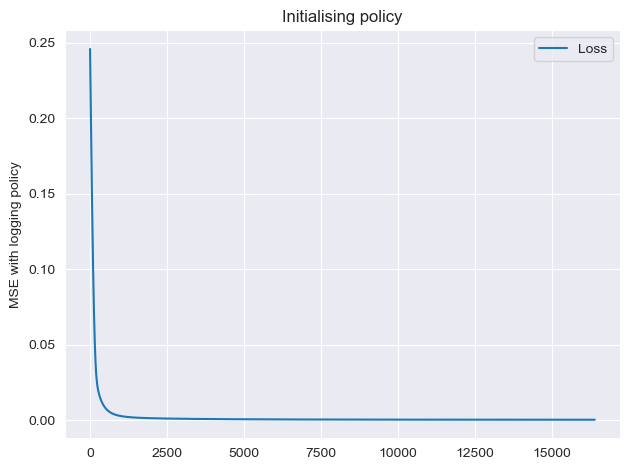

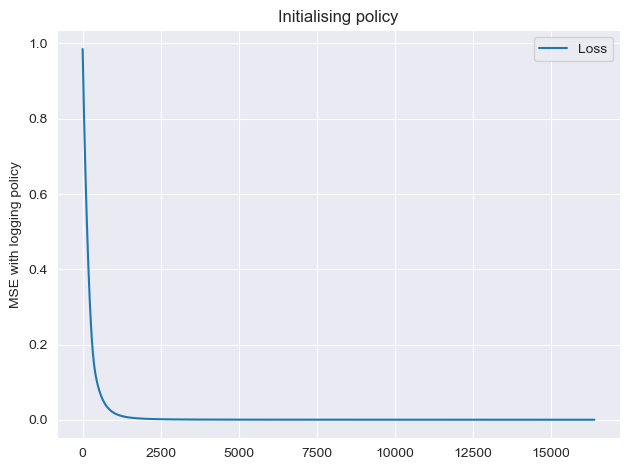

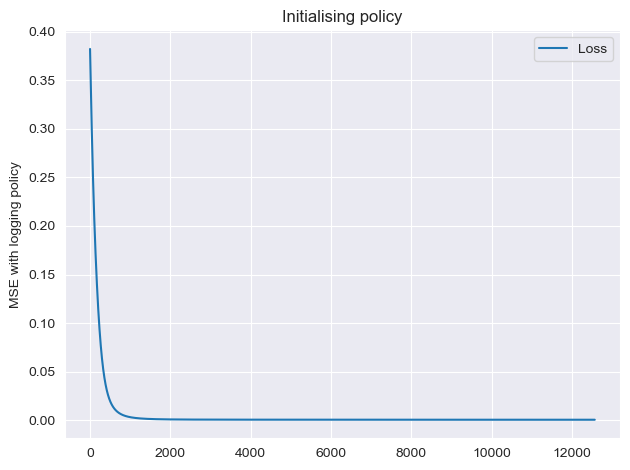

In [4]:
# Placeholders for output
auction_revenue = []
social_welfare = []
social_surplus = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

    # Log 'Net utility' or surplus
    social_surplus.append(sum([agent.net_utility for agent in auction.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue.append(auction.revenue)
    auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue = np.array(auction_revenue) / rounds_per_iter
social_welfare = np.array(social_welfare) / rounds_per_iter
social_surplus = np.array(social_surplus) / rounds_per_iter

In [72]:
# data generation
# just take the first agent's data (dont know is it correct)
# Q2 the bidder updates seems does not use the utilities but the estimated_CTRs instead
# it seems to only use the utilities to calculate the welfare and surplus
# Input: context
# Action: bid/ gamma
# Output: reward
trained_welfare = {}
trained_surplus = {}

offline_data = {'train':{}, 'test':{}}


num_data = [52000, 8000]

for i, data_set in enumerate(offline_data.keys()):
    for _ in range(num_data[i]):
        auction.simulate_opportunity()
    for agent_id, agent in enumerate(auction.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
        offline_data[data_set][agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction.clear_revenue()

In [ ]:
offline_data_key = {'context': 0, 'estimated_CTR': 5, 'value': 6, 'bid': 7, 'gamma': 8, 'true_CTR': 9, 'price': 10, 'second_price': 11, 'won_mask': 12, 'outcome': 13, 'utility': 14}

In [208]:
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        np.savetxt(f'DR_L_{data_set}_{agent_id}.csv', offline_data[data_set][agent_id])

In [75]:
def gridSearch(model, param_grid, input_data, output_data):
    grid_cv = GridSearchCV(model, param_grid, cv=5, n_jobs=-1).fit(input_data, output_data)
    print("Param for GS", grid_cv.best_params_)
    print("CV score for GS", grid_cv.best_score_)
    return grid_cv.best_estimator_

In [76]:
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15]
}
model = tree.DecisionTreeRegressor()
# should I set random state here?
# mb k-fold is not nesscary here
# input_data = np.hstack((trained_data[0][:, :5], trained_data[0][:, 5].reshape(-1, 1)))

In [185]:
# context with bid
context_bid_estimators = {}
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators[agent_id] = best_estimator

# cv fault is 5

Agent 0
Param for GS {'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.8471693773921227
Test R2 score: 0.8477375961192545
Train MSE:  0.004562283735448849
Test MSE:  0.00860362295185162
Agent 1
Param for GS {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
CV score for GS 0.8852933363943075
Test R2 score: 0.8972959214197778
Train MSE:  0.00238959167868599
Test MSE:  0.00602061967496783
Agent 2
Param for GS {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10}
CV score for GS 0.8901610062071127
Test R2 score: 0.9032326806750876
Train MSE:  0.001624335839335949
Test MSE:  0.0040604764092813045


In [299]:
# This is for single agent get replaced by surrogate model
for agent_id in offline_data['train'].keys():
    surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
    data_set = 'test'
    surrogate_agent_id = agent_id
    surrogate_bid = context_bid_estimators[surrogate_agent_id].predict(offline_data[data_set][surrogate_agent_id][:, :5])
    context_num = 5
    for i in range(len(offline_data[data_set][surrogate_agent_id])):
        # win_mask
        if offline_data[data_set][surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['second_price']]):
                surrogate_logs['won_mask'].append(True)
                surrogate_logs['outcomes'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['outcome']])
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])
        else:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']]):
                surrogate_logs['won_mask'].append(True)
                # This creates randomness in the surrogate model
                outcome = rng.binomial(1, offline_data[data_set][surrogate_agent_id][i, offline_data_key['true_CTR']])
                surrogate_logs['outcomes'].append(outcome)
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])

    surrogate_won_mask = np.array(surrogate_logs['won_mask'])
    surrogate_outcomes = np.array(surrogate_logs['outcomes'])
    surrogate_prices = np.array(surrogate_logs['prices'])
    surrogate_utilities = np.zeros_like(offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']])
    surrogate_utilities[surrogate_won_mask] = (offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
    print(f"Agent: {agent_id}")
    print(f"Original utility: {offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].mean()}")
    print(f"Surrogate utility: {surrogate_utilities.mean()}" )
    print(f"R2 score: {r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities)}")

Agent: 0
Original utility: 0.024177103849533664
Surrogate utility: 0.022457464446702585
R2 score: 0.7480383951257003
Agent: 1
Original utility: -0.011352402715902469
Surrogate utility: -0.011976056842977778
R2 score: 0.8697296504394383
Agent: 2
Original utility: 0.04247413235161559
Surrogate utility: 0.04326502529411769
R2 score: 0.9007667259100549


<AxesSubplot:>

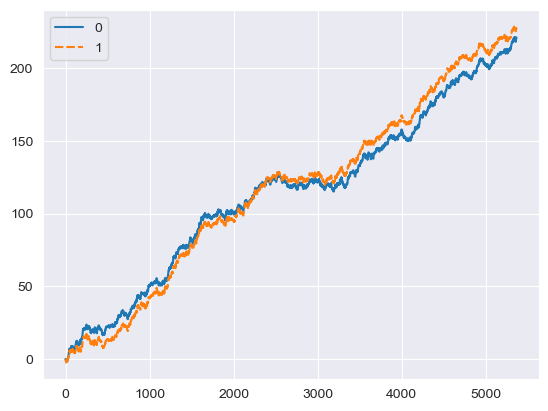

In [245]:
sns.lineplot(data=[surrogate_utilities.cumsum(), offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].cumsum()])

In [316]:
# TODO: add label to features

In [304]:
explainer = shap.TreeExplainer(context_bid_estimators[0])

In [319]:
shap_values = explainer.shap_values(offline_data['test'][0][:, :5])
# naturally, the constant/ bias term in context doesnt have any effect on the prediction

In [320]:
offline_data['test'][0][:, :5].shape

(5320, 5)

In [321]:
shap_values.shape

(5320, 5)

In [317]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:200,:], offline_data['test'][0][:200, :5])

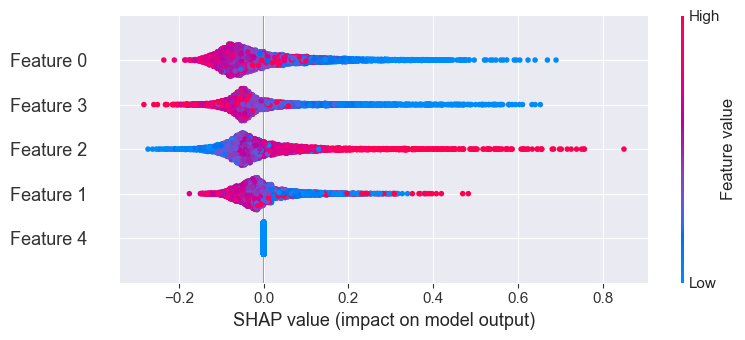

In [322]:
shap.summary_plot(shap_values, offline_data['test'][0][:, :5])

In [207]:
# # This is for single agent get replaced by surrogate model
#
# surrogate_model = None
# data_set = 'test'
# surrogate_agent_id = 0
# surrogate_bid = test_preds
# j = 0
# for i in range(len(participating_agents_logs[data_set])):
#     bids = []
#     CTRs = []
#     if surrogate_agent_id in participating_agents_logs[data_set][i]:
#         for agent_id in offline_data[data_set].keys():
#             if agent_id == surrogate_agent_id:
#                 bids.append(test_preds[j])
#                 j+=1
#             else:
#                 bids.append(offline_data[data_set][agent_id][j, 7])
#             CTRs.append(offline_data[data_set][agent_id][j, 9])
#         bids = np.array(bids)
#         CTRs = np.array(CTRs)
#         winners = np.argsort(-bids)[:1]
#         outcomes = rng.binomial(1, CTRs[winners])
#         # currently only consider one winner
#         if surrogate_agent_id == winners:
#             surrogate_logs['outcomes'].append(outcomes)
#             surrogate_logs['won_mask'].append(1)
#         else:
#             surrogate_logs['outcomes'].append(0)
#             surrogate_logs['won_mask'].append(0)
#         surrogate_logs['prices'].append(bids[winners])
#     else:
#         pass

In [83]:
# context with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.7276250965125122
Test R2 score: 0.7416675628006455
Train MSE:  0.00022022459909153483
Test MSE:  0.00027168110604471903
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.4048234159067919
Test R2 score: 0.39205196499514683
Train MSE:  0.00013023620239745016
Test MSE:  0.0001698578591254831
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [210]:
# estimated_CTR and value with bid
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
CV score for GS 0.9994057387395154
Test R2 score: 0.9993624406666591
Train MSE:  2.1039844916142337e-05
Test MSE:  3.602544011977278e-05
Agent 1
Param for GS {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.9999547836211953
Test R2 score: 0.9999626617457903
Train MSE:  4.217735241951066e-07
Test MSE:  2.1888072122472528e-06
Agent 2
Param for GS {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
CV score for GS 0.9993136801654782
Test R2 score: 0.9993091525895826
Train MSE:  2.3764045696378117e-05
Test MSE:  2.8988811842495896e-05


In [85]:
# estimated_CTR and value with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.9069516511333034
Test R2 score: 0.9079438564449289
Train MSE:  9.46583991692418e-05
Test MSE:  9.681290963841697e-05
Agent 1
Param for GS {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.6273128939537818
Test R2 score: 0.6142501426573515
Train MSE:  9.935543498714107e-05
Test MSE:  0.00010777671964292107
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [237]:
x = context_bid_estimators[0]

In [223]:
x([2, 3])

TypeError: 'DecisionTreeRegressor' object is not callable

In [240]:
float(x.predict(np.array([1, 2, 3, 2, 3]).reshape(-1, 5)))

0.7775402386708143

In [241]:
len(np.array([1, 2, 3, 2, 3]))

5

In [243]:
np.argmax(np.array([1, 2, 3, 2, 3]))

2